#Adaptive Learning System:

An adaptive learning system is an educational technology that adjusts the presentation of material based on the individual learner's needs, often using data and algorithms to provide personalized learning experiences.
How It Works: These systems collect data on the learner's performance and learning style, then adapt content delivery, pacing, and assessment to optimize the learning process. This personalization helps in addressing the unique needs of each learner, potentially improving learning outcomes.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Rohit Rawat\Desktop\sem4miniproject\adaptive_learning_data.csv")

# Display the first few rows of the dataframe
print(df.head())


  Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate  
1   

In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Inspect the dataframe again to ensure it's clean
print(df.head())


Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64
  Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobi

In [4]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Display the first few rows of the encoded dataframe
print(df.head())


   Gender  Age  Education Level  Institution Type  IT Student  Location  \
0       0    3                2                 1           0         1   
1       1    3                2                 1           0         1   
2       1    2                0                 0           0         1   
3       1    1                1                 1           0         1   
4       1    2                1                 1           0         1   

   Load-shedding  Financial Condition  Internet Type  Network Type  \
0              1                    0              1             2   
1              0                    0              0             2   
2              1                    0              1             2   
3              1                    0              0             2   
4              1                    1              0             1   

   Class Duration  Self Lms  Device  Adaptivity Level  
0               2         0       2                 2  
1               

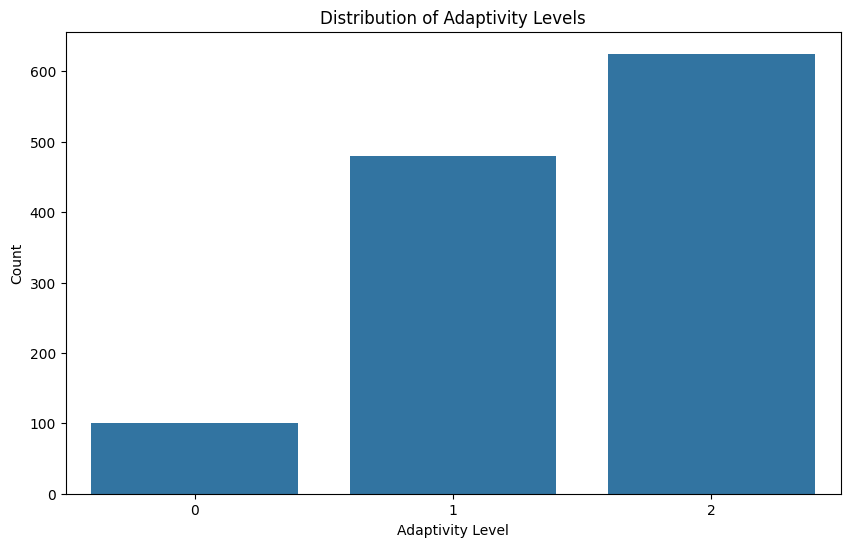

In [5]:
# Define the features and target variable
X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']
 # Visualization: Distribution of Adaptivity Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Adaptivity Level', data=df)
plt.title('Distribution of Adaptivity Levels')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.show()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

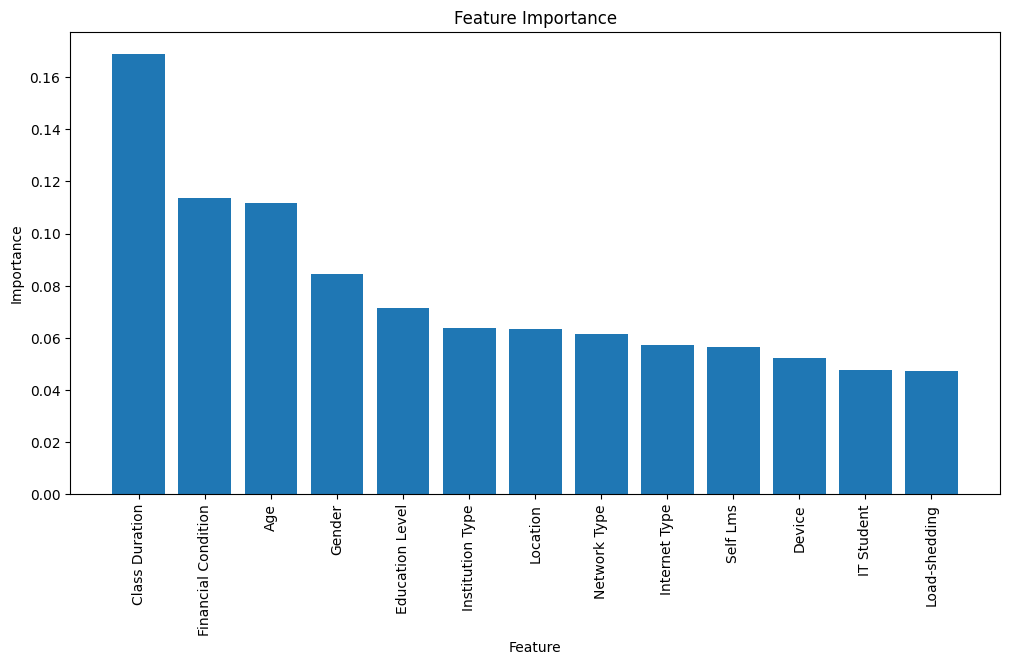

In [7]:
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [8]:
# Predict the labels for the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.93      0.94      0.94       103
           2       0.90      0.94      0.92       115

    accuracy                           0.91       241
   macro avg       0.91      0.84      0.87       241
weighted avg       0.91      0.91      0.91       241



Precision and recall help you understand the model's accuracy in predicting each class
F1 Score provides a balanced measure of precision and recall.
 Support helps you understand the distribution of the classes in your dataset.

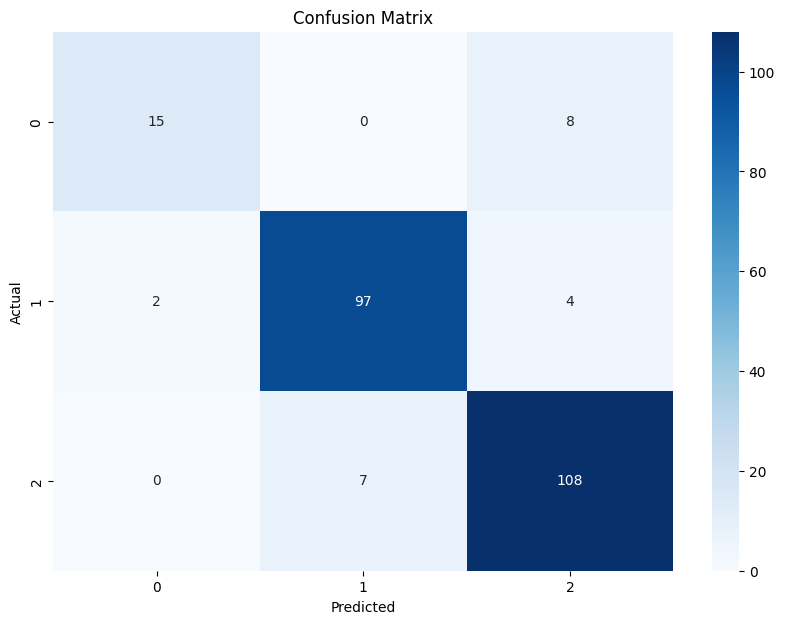

In [9]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [11]:
for i in range(1):
    for j in range(1,i):
        print(i)